# Tarea de Regresión Ridge y Lasso - CDA 202020

Autores:
- José Barraquer López (201217736)
- Andrés Ávila Rojas (201319127)
- Daniel Jaramillo (201014324)
- Leidy Ferro Lara (201728578) 

Se cargan las librerías necesarias:

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


from sklearn import datasets, linear_model
from sklearn import datasets, linear_model
#import statsmodels.api as sm
from scipy import stats
from regressors import stats 


from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


## Pregunta 1
Preguntas en la práctica 5:

1. *¿Qué significado tiene el intercepto? ¿Tiene sentido ser analizado para este problema?*

El intercepto mostrado en el problema aquí presentado se muestra en la siguiente imagen.

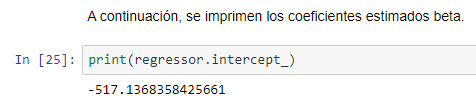

El intercepto es el valor que representa el pronóstico del modelo cuando todos sus regresores o variables son 0. En este caso, teniendo en cuenta el contexto del problema, son observables dos cuestiones: Por un lado, la variable objetivo no puede ser interpretada como un valor negativo; un valor negativo representaría que al usuario se le debería pagar, lo cual no tiene sentido bajo el contexto del problema. Por otro lado, analizar el evento en el cual todas las variables son cero tampoco tiene sentido, debido a que implica cuestiones como un bmi =0, que dado el significado del bmi sería imposible que existiese una persona con ese valor. Por lo tanto, se puede concluir que no tiene sentido analizar el intercepto de la regresión en este problema.

2. *¿Qué significado tienen los coeficientes que acompañan a las variables categóricas? (i.e smoker_no, smoker_yes)*

En la siguiente imagen se muestra la tabla de coeficientes obtenidas de la regresión multiple del problema.

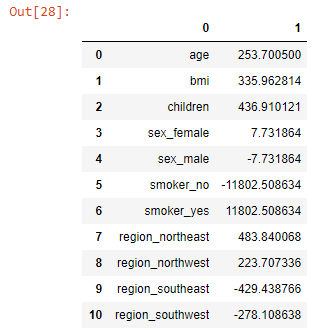

3. *Realice la estimación de la variable respuesta pero solo con las variables numéricas. ¿Cuál modelo utilizaría para predecir la prima del seguro? ¿Por qué?*

Para responder esta pregunta se presenta el siguiente modelo de regresión múltiple obtenido de los datos disponibles para la solución del problema.

## Pregunta 2
Con los datos utilizados en la práctica 6 (regresión ridge y Lasso), determine cuál es el mejor valor de alpha para el modelo de regresión ridge y lasso, para tal fin, divida la data en entrenamiento y validación (puede ser 80% para entrenamiento y 20% para validación), estime distintos modelos de regresión (ridge y lasso) utilizando la data de entrenamiento y distintos valores de alpha, luego, aplique los modelos estimados sobre la data de entrenamiento y validación, construya un gráfico (ver figura 1), donde en el eje x, se encuentra los distintos valores de alpha y en el eje y se encuentra una medida de error (puede utilizar una de las medidas de error que se encuentran en el laboratorio 6). A partir de este gráfico, determine el mejor valor de alpha.
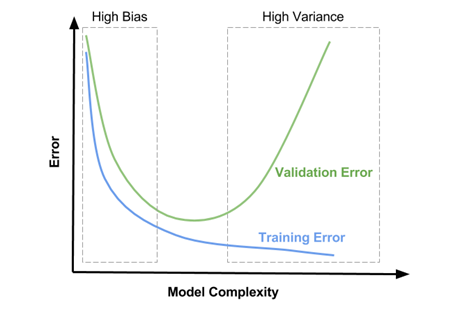

### Modelo de regresión múltiple

La siguiente práctica se trabajará con los mismmos datos de la práctica de regresión (los datos se pueden encontrar en el link https://drive.google.com/file/d/195gkZ5cTZL11L308MHc7EyBbAoiB4xqf/view), para ello, retomemos de nuevo el modelo de regresión múltiples que se construyó anteriormente

In [2]:
##Lectura de los datos
dataset = pd.read_csv('winequality.csv')

In [3]:
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Determinar el tamaño del dataset

In [4]:
dataset.shape

(1599, 12)

Para realizar un análisis descriptivo sobre el dataset

In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Identifiquemos cuáles son las variables que tienen algún Na

In [6]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Se puede observar que ninguna variable contiene missing, si alguna varaibles tuviera missing, estos se pueden eliminar con el siguiente código.

In [7]:
dataset = dataset.fillna(method='ffill')

A continuación, se construye la matriz X y el vector y, los cuales contiene las variables explicativas y la variable respuesta:

In [8]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

Analicemos la variable quality

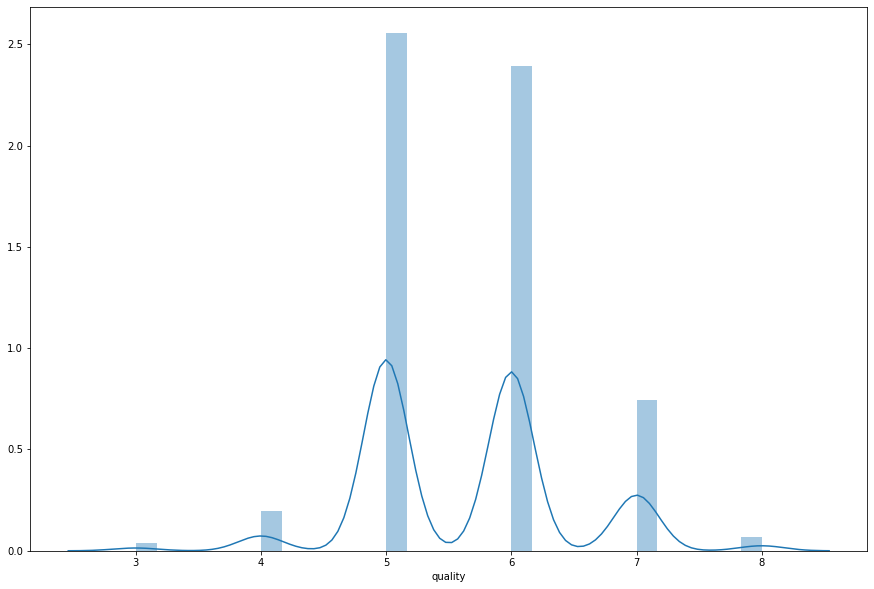

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

A continuación, se realiza una partición sobre la data, paa efectos de este ejercicio, se tomará 80% como entrenamiento y 20% como test.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

A continuación se estima el modelo

In [11]:
regressor = LinearRegression()  


In [12]:
X_train.shape

(1279, 11)

In [13]:
y_train.shape

(1279,)

In [14]:
regressor.fit(X_train, y_train)

LinearRegression()

A continuación, se imprimen los coeficientes estimados beta.

In [15]:
##Para imprimir el intercepto
print(regressor.intercept_)

34.998710628721106


In [16]:
variables=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']
coeff_df = pd.DataFrame(regressor.coef_, variables, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


### ¿Cómo se interpretan los resultados anteriores?

A continuación, se aplica el modelo estiado sobre los datos de test.

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


A continuación, se realiza un gráfico que permite comparar el valor estimado y el observado, sobre algunas observaciones

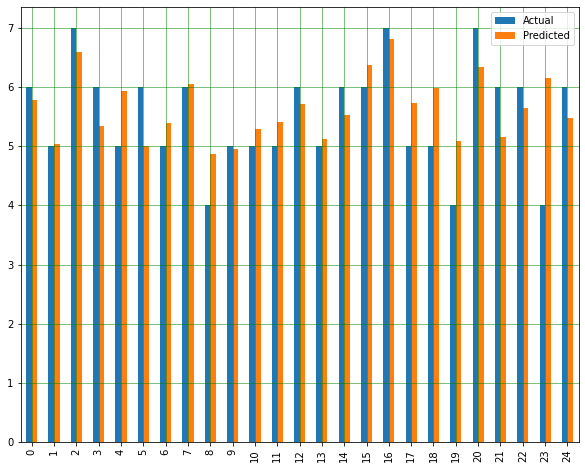

In [19]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Finalmente, se imprimen algunas métricas.

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46963309286611016
Mean Squared Error: 0.3844711978201237
Root Mean Squared Error: 0.6200574149384263


### Un análisis más profundo

In [21]:
dataset=dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values


In [22]:
xlabels=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']

In [23]:
print("\n=========== SUMMARY ===========")
xlabels=np.asarray(xlabels)
stats.summary(regressor, X_train, y_train, xlabels)



=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
 4.2478  5.2596  5.5963  6.0091  7.5836


Coefficients:
                       Estimate  Std. Error  t value   p value
_intercept            34.998711   16.836011   2.0788  0.037835
fixed acidity          0.041284    0.009169   4.5024  0.000007
volatile acidity      -1.149528    0.120918  -9.5067  0.000000
citric acid           -0.177927    0.155172  -1.1466  0.251744
residual sugar         0.027870    0.013065   2.1331  0.033103
chlorides             -1.873407    0.452351  -4.1415  0.000037
free sulfur dioxide    0.002684    0.002219   1.2092  0.226802
total sulfur dioxide  -0.002777    0.000491  -5.6570  0.000000
density              -31.516666   17.520160  -1.7989  0.072274
pH                    -0.254486    0.107163  -2.3747  0.017708
sulphates              0.924040    0.113197   8.1631  0.000000
alcohol                0.267797    0.010687  25.0593  0.000000
---
R-squared:  0.36545,    Adjusted R-sq

### Regresión Lasso y regresión Ridge

### Regresión ridge sin restringir de manera significativa los coeficientes estimados beta

In [24]:
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

In [25]:
print("\n=========== SUMMARY ===========")
xlabels=np.asarray(xlabels)
stats.summary(rr, X_train, y_train, xlabels)


=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
 4.2154  5.2674   5.608  6.0108  7.5063


Coefficients:
                      Estimate  Std. Error  t value   p value
_intercept            6.225103   16.845702   0.3695  0.711789
fixed acidity         0.013934    0.009174   1.5188  0.129051
volatile acidity     -1.171966    0.120988  -9.6867  0.000000
citric acid          -0.179196    0.155261  -1.1542  0.248652
residual sugar        0.015726    0.013073   1.2029  0.229219
chlorides            -1.920733    0.452612  -4.2437  0.000024
free sulfur dioxide   0.002971    0.002221   1.3378  0.181202
total sulfur dioxide -0.002867    0.000491  -5.8360  0.000000
density              -2.139739   17.530245  -0.1221  0.902871
pH                   -0.401655    0.107225  -3.7459  0.000188
sulphates             0.882125    0.113262   7.7883  0.000000
alcohol               0.294844    0.010693  27.5744  0.000000
---
R-squared:  0.36472,    Adjusted R-squared:  0.359

### Regresión ridge restringiendo los coeficientes betas estimados

In [26]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100)

In [27]:
print("\n=========== SUMMARY ===========")
xlabels=np.asarray(xlabels)
stats.summary(rr100, X_train, y_train, xlabels)


=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
 4.7596  5.3149   5.581  5.9363  7.5295


Coefficients:
                      Estimate  Std. Error  t value   p value
_intercept            2.251997   17.580117   0.1281  0.898091
fixed acidity         0.045626    0.009574   4.7654  0.000002
volatile acidity     -0.346752    0.126262  -2.7463  0.006112
citric acid           0.095435    0.162030   0.5890  0.555968
residual sugar        0.001251    0.013643   0.0917  0.926944
chlorides            -0.032935    0.472344  -0.0697  0.944422
free sulfur dioxide   0.005296    0.002317   2.2855  0.022446
total sulfur dioxide -0.003156    0.000513  -6.1550  0.000000
density              -0.000802   18.294504  -0.0000  0.999965
pH                   -0.062606    0.111900  -0.5595  0.575933
sulphates             0.225313    0.118200   1.9062  0.056849
alcohol               0.316396    0.011159  28.3539  0.000000
---
R-squared:  0.30812,    Adjusted R-squared:  0.302

### Plot para comparar los coeficientes betas estimados

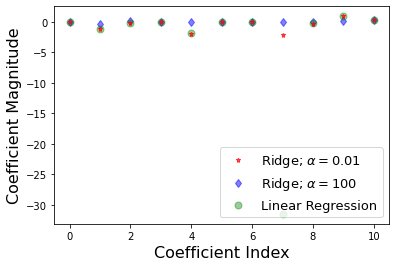

In [28]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(regressor.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

### A continuación se comparar las medidas de error al aplica el modelo de regresión, el modelo de regresión ridge con aplha=0,01 y el modelo de regresión ridge con alpha=100

In [29]:
y_pred_rr = rr.predict(X_test)
y_pred_rr100 = rr100.predict(X_test)

In [30]:
print("=======Errores del modelo de regresión lineal ========")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("======== Errores del modelo de regresión ridge aplha=0.01 =========")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr)))

print("======== Errores del modelo de regresión ridge aplha=100 =========")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rr100))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rr100))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rr100)))



=======Errores del modelo de regresión lineal ========
Mean Absolute Error: 0.46963309286611016
Mean Squared Error: 0.3844711978201237
Root Mean Squared Error: 0.6200574149384263
======== Errores del modelo de regresión ridge aplha=0.01 =========
Mean Absolute Error: 0.4687283818865495
Mean Squared Error: 0.38275494419748324
Root Mean Squared Error: 0.6186719196775325
======== Errores del modelo de regresión ridge aplha=100 =========
Mean Absolute Error: 0.48084341377069756
Mean Squared Error: 0.3949972082723098
Root Mean Squared Error: 0.628488033515603


### Regresión Lasso

Ajuste del modelo Lasso con los parámetros por default (alpha = 1)

In [31]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [32]:
print("\n=========== SUMMARY ===========")
xlabels=np.asarray(xlabels)
stats.summary(lasso, X_train, y_train, xlabels)


=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
 4.7765  5.5895  5.6794  5.7369  5.7945


Coefficients:
                      Estimate  Std. Error  t value   p value
_intercept            5.816085   20.789419   0.2798  0.779706
fixed acidity         0.000000    0.011322   0.0000  1.000000
volatile acidity     -0.000000    0.149312  -0.0000  1.000000
citric acid           0.000000    0.191609   0.0000  1.000000
residual sugar        0.000000    0.016133   0.0000  1.000000
chlorides            -0.000000    0.558572  -0.0000  1.000000
free sulfur dioxide   0.000000    0.002740   0.0000  1.000000
total sulfur dioxide -0.003597    0.000606  -5.9335  0.000000
density              -0.000000   21.634219  -0.0000  1.000000
pH                   -0.000000    0.132327  -0.0000  1.000000
sulphates             0.000000    0.139778   0.0000  1.000000
alcohol               0.000000    0.013196   0.0000  1.000000
---
R-squared:  0.03246,    Adjusted R-squared:  0.024

### Regresión Lasso con alpha= 0.01

In [33]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=1000000.0)

In [34]:
print("\n=========== SUMMARY ===========")
xlabels=np.asarray(xlabels)

stats.summary(lasso001, X_train, y_train, xlabels)


=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
 4.4792  5.2959  5.5915  5.9736  7.4861


Coefficients:
                      Estimate  Std. Error  t value   p value
_intercept            2.446120   17.114037   0.1429  0.886367
fixed acidity         0.033734    0.009321   3.6194  0.000307
volatile acidity     -0.937567    0.122915  -7.6278  0.000000
citric acid           0.000000    0.157735   0.0000  1.000000
residual sugar        0.001425    0.013281   0.1073  0.914558
chlorides            -0.000000    0.459821  -0.0000  1.000000
free sulfur dioxide   0.003449    0.002256   1.5290  0.126519
total sulfur dioxide -0.002624    0.000499  -5.2573  0.000000
density              -0.000000   17.809484  -0.0000  1.000000
pH                   -0.000000    0.108933  -0.0000  1.000000
sulphates             0.382792    0.115067   3.3267  0.000904
alcohol               0.310018    0.010863  28.5389  0.000000
---
R-squared:  0.34432,    Adjusted R-squared:  0.338

### Regresión Lasso con alpha = 0.0001

In [35]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, max_iter=1000000.0)

In [36]:
print("\n=========== SUMMARY ===========")
xlabels=np.asarray(xlabels)



=========== SUMMARY ===========


In [37]:
stats.summary(lasso00001, X_train, y_train, xlabels)

Residuals:
    Min      1Q  Median      3Q     Max
 4.2182  5.2677  5.6083  6.0109  7.4999


Coefficients:
                      Estimate  Std. Error  t value   p value
_intercept            4.081573   16.847347   0.2423  0.808611
fixed acidity         0.012283    0.009175   1.3387  0.180915
volatile acidity     -1.171399    0.120999  -9.6810  0.000000
citric acid          -0.172449    0.155277  -1.1106  0.266953
residual sugar        0.014589    0.013074   1.1159  0.264673
chlorides            -1.871817    0.452656  -4.1352  0.000038
free sulfur dioxide   0.002994    0.002221   1.3483  0.177789
total sulfur dioxide -0.002868    0.000491  -5.8373  0.000000
density              -0.000000   17.531956  -0.0000  1.000000
pH                   -0.399869    0.107236  -3.7289  0.000201
sulphates             0.870411    0.113273   7.6842  0.000000
alcohol               0.297003    0.010694  27.7736  0.000000
---
R-squared:  0.36460,    Adjusted R-squared:  0.35908
F-statistic: 66.09 on 11 featu

### Plot para comparar los coeficientes betas estimados

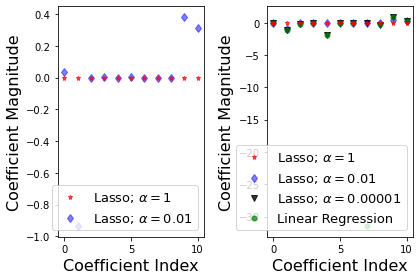

In [38]:
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(regressor.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()


### A continuación se va a comparar las medidas de error al aplicar sobre la data de test el modelo de regresión lineal, el modelo de regresión lasso con alpha = 1, el modelo de regresión lasso con alpha= 0.01 y el modelo de regresión lasso con alha = 0.0001 

In [39]:
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso001 = lasso001.predict(X_test)
y_pred_lasso00001 = lasso00001.predict(X_test)


In [40]:
print("=======Errores del modelo de regresión lineal ========")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("======== Errores del modelo de regresión lasso aplha=1 =========")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lasso))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lasso))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

print("======== Errores del modelo de regresión lasso aplha=0.01 =========")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lasso001))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lasso001))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso001)))


print("======== Errores del modelo de regresión lasso aplha=0.0001 =========")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lasso00001))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lasso00001))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso00001)))


=======Errores del modelo de regresión lineal ========
Mean Absolute Error: 0.46963309286611016
Mean Squared Error: 0.3844711978201237
Root Mean Squared Error: 0.6200574149384263
======== Errores del modelo de regresión lasso aplha=1 =========
Mean Absolute Error: 0.6159175814801839
Mean Squared Error: 0.5558361552524876
Root Mean Squared Error: 0.7455442007369433
======== Errores del modelo de regresión lasso aplha=0.01 =========
Mean Absolute Error: 0.47364766826818816
Mean Squared Error: 0.38828664720540534
Root Mean Squared Error: 0.6231265097918763
======== Errores del modelo de regresión lasso aplha=0.0001 =========
Mean Absolute Error: 0.4686774354326323
Mean Squared Error: 0.38268336035864814
Root Mean Squared Error: 0.6186140641455286


<h1> Inicio tarea</h1>

In [41]:
dataset = pd.read_csv('winequality.csv')

In [42]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
values = [0.0001,0.01, 0.1,0.2,0.5,0.7,1,3,5,10,20,30,60,80,1000]
# values.sort(reverse=True)


In [45]:
erro_df = pd.DataFrame(columns = ['alpha','er_lasso_train','er_lasso_test','er_ridge_train','er_ridge_test'])

In [46]:
erro_df.append({'alpha':0,'er_lasso_train':1,'er_lasso_test':2,'er_ridge_train':3,'er_ridge_test':4},ignore_index=True)

,alpha,er_lasso_train,er_lasso_test,er_ridge_train,er_ridge_test
0,0,1,2,3,4


In [47]:

for i in values:
    ridge = Ridge(alpha=i)
    lasso = Lasso(alpha=i)
    
    ridge.fit(X_train,y_train)
    lasso.fit(X_train,y_train)
    
    y_pred_ridge_train = ridge.predict(X_train)
    y_pred_lasso_train = lasso.predict(X_train)
    
    y_pred_ridge_test = ridge.predict(X_test)
    y_pred_lasso_test = lasso.predict(X_test)
    
    ridge_train_MAE = metrics.mean_absolute_error(y_train, y_pred_ridge_train)
    lasso_train_MAE = metrics.mean_absolute_error(y_train, y_pred_lasso_train)
    
    ridge_test_MAE = metrics.mean_absolute_error(y_test, y_pred_ridge_test)
    lasso_test_MAE = metrics.mean_absolute_error(y_test, y_pred_lasso_test)
    
    erro_df = erro_df.append({'alpha':i,'er_lasso_train':lasso_train_MAE,'er_lasso_test':lasso_test_MAE,
                    'er_ridge_train':ridge_train_MAE,'er_ridge_test':ridge_test_MAE},ignore_index=True)

In [48]:
erro_df

,alpha,er_lasso_train,er_lasso_test,er_ridge_train,er_ridge_test
0,0.0001,0.510585,0.468677,0.509694,0.469417
1,0.0100,0.520287,0.473648,0.510465,0.468728
2,0.1000,0.569101,0.511414,0.510580,0.468638
3,0.2000,0.596778,0.538459,0.510663,0.468578
4,0.5000,0.661130,0.613070,0.510884,0.468498
5,0.7000,0.662543,0.614209,0.511014,0.468495
6,1.0000,0.664663,0.615918,0.511212,0.468506
7,3.0000,0.678796,0.627307,0.512607,0.469235
8,5.0000,0.692928,0.638696,0.513486,0.469606
9,10.0000,0.693312,0.639005,0.515039,0.469979


In [49]:
import matplotlib.pyplot as plt

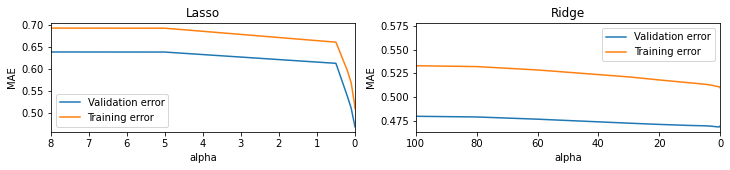

In [50]:
plt.figure(figsize = (12,2))
ax = plt.subplot(1,2,1)
plt.plot(erro_df['alpha'].values, erro_df['er_lasso_test'].values, label = 'Validation error')
plt.plot(erro_df['alpha'].values, erro_df['er_lasso_train'].values, label = 'Training error')

plt.xlim(0,8)
ax2 = plt.subplot(1,2,2)
plt.plot(erro_df['alpha'].values, erro_df['er_ridge_test'].values, label = 'Validation error')
plt.plot(erro_df['alpha'].values, erro_df['er_ridge_train'].values, label = 'Training error')

plt.xlim(0,100)

ax.legend()
ax2.legend()
ax.title.set_text('Lasso')
ax2.title.set_text('Ridge')
ax.title.set_text('Lasso')
ax2.title.set_text('Ridge')
ax.set_xlabel('alpha')
ax.set_ylabel('MAE')
ax2.set_xlabel('alpha')
ax2.set_ylabel('MAE')

ax.invert_xaxis()
ax2.invert_xaxis()

<h1> Revisión con valores pequeños</h1> 

In [51]:
dataset = pd.read_csv('winequality.csv')

In [52]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
values = [0,0.0000001,0.000001,0.00001,0.00001,0.0001,0.001,0.01,0.01,0.1,1 ]

In [55]:
erro_df = pd.DataFrame(columns = ['alpha','er_lasso_train','er_lasso_test','er_ridge_train','er_ridge_test'])

In [56]:
erro_df.append({'alpha':0,'er_lasso_train':1,'er_lasso_test':2,'er_ridge_train':3,'er_ridge_test':4},ignore_index=True)

,alpha,er_lasso_train,er_lasso_test,er_ridge_train,er_ridge_test
0,0,1,2,3,4


In [57]:

for i in values:
    ridge = Ridge(alpha=i)
    lasso = Lasso(alpha=i)
    
    ridge.fit(X_train,y_train)
    lasso.fit(X_train,y_train)
    
    y_pred_ridge_train = ridge.predict(X_train)
    y_pred_lasso_train = lasso.predict(X_train)
    
    y_pred_ridge_test = ridge.predict(X_test)
    y_pred_lasso_test = lasso.predict(X_test)
    
    ridge_train_MAE = metrics.mean_absolute_error(y_train, y_pred_ridge_train)
    lasso_train_MAE = metrics.mean_absolute_error(y_train, y_pred_lasso_train)
    
    ridge_test_MAE = metrics.mean_absolute_error(y_test, y_pred_ridge_test)
    lasso_test_MAE = metrics.mean_absolute_error(y_test, y_pred_lasso_test)
    
    erro_df = erro_df.append({'alpha':i,'er_lasso_train':lasso_train_MAE,'er_lasso_test':lasso_test_MAE,
                    'er_ridge_train':ridge_train_MAE,'er_ridge_test':ridge_test_MAE},ignore_index=True)

<ipython-input-57-a83f3e0ceeee>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train,y_train)
C:\Users\anavr\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\anavr\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 272.30445801159647, tolerance: 0.08582627052384678
  model = cd_fast.enet_coordinate_descent(


In [58]:
erro_df

,alpha,er_lasso_train,er_lasso_test,er_ridge_train,er_ridge_test
0,0.000000e+00,0.509614,0.469633,0.509614,0.469633
1,1.000000e-07,0.509618,0.469623,0.509615,0.469633
2,1.000000e-06,0.509650,0.469534,0.509615,0.469631
3,1.000000e-05,0.510083,0.468886,0.509623,0.469609
4,1.000000e-05,0.510083,0.468886,0.509623,0.469609
5,1.000000e-04,0.510585,0.468677,0.509694,0.469417
6,1.000000e-03,0.511562,0.468830,0.510103,0.468879
7,1.000000e-02,0.520287,0.473648,0.510465,0.468728
8,1.000000e-02,0.520287,0.473648,0.510465,0.468728
9,1.000000e-01,0.569101,0.511414,0.510580,0.468638


In [59]:
import matplotlib.pyplot as plt

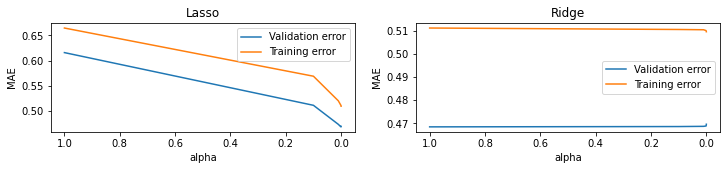

In [60]:
fig = plt.figure(figsize = (12,2))
ax = plt.subplot(1,2,1)
plt.plot(erro_df['alpha'].values, erro_df['er_lasso_test'].values, label = 'Validation error')
plt.plot(erro_df['alpha'].values, erro_df['er_lasso_train'].values, label = 'Training error')

# plt.xlim(0,2)
ax2 = plt.subplot(1,2,2)
plt.plot(erro_df['alpha'].values, erro_df['er_ridge_test'].values, label = 'Validation error')
plt.plot(erro_df['alpha'].values, erro_df['er_ridge_train'].values, label = 'Training error')

# plt.xlim(0,100)

ax.legend()
ax2.legend()
ax.title.set_text('Lasso')
ax2.title.set_text('Ridge')
ax.set_xlabel('alpha')
ax.set_ylabel('MAE')
ax2.set_xlabel('alpha')
ax2.set_ylabel('MAE')

ax.invert_xaxis()
ax2.invert_xaxis()

In [61]:
ax.set_xlabel('alpha')
ax.set_ylabel('MAE')

Text(17.200000000000003, 0.5, 'MAE')